In [28]:
#BotWin
#Robô para operar mini índice com inteligência artificial
#Book de Ofertas mini dólar com Python | Tape reading mini índice automático     https://www.youtube.com/watch?v=Z4txWoOTxLo   
#Operando Mini Índice e Dólar com Python na B3!                                  https://www.youtube.com/watch?v=1teVmrrQFOg   https://github.com/codigoquant
#Machine learning na bolsa de valores // Prevendo preço das ações usando python  https://www.youtube.com/watch?v=VhjQwahg8MY   https://github.com/fabrimatt/machine_learnig/blob/master/Previs%C3%A3o%20pre%C3%A7o%20a%C3%A7%C3%B5es.ipynb
#Python para finanças // Machine Learning Prevendo preço das ações na bolsa      https://www.youtube.com/watch?v=CvfAx3_nGME
#Engenharia de dados Criando um programa de manipulação de dados em python       https://www.youtube.com/watch?v=gew9014pGaM

import pandas as pd
from datetime import datetime
import time
#união
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#pip install MetaTrader5


In [30]:
import MetaTrader5 as mt5

In [31]:
# Estabelecemos a conexão com o terminal MetaTrader 5 para a conta especificada
if not mt5.initialize(login=1080105106, server="ClearInvestimentos-DEMO",password="AliAli1324"):
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# imprimimos informações sobre o estado da conexão, o nome do servidor e a conta de negociação
print(mt5.terminal_info())
# imprimimos informações sobre a versão do MetaTrader 5
print(mt5.version())
 
# concluímos a conexão ao terminal MetaTrader 5
#mt5.shutdown()

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=True, mqid=True, build=3003, maxbars=100000, codepage=1252, ping_last=12640, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5', ...)
(500, 3003, '22 Jul 2021')


In [32]:
def get_ohlc(ativo, timeframe, n=10):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time']=pd.to_datetime(ativo['time'], unit='s' )
    ativo.set_index('time',inplace=True)
    return ativo

In [33]:
WIN_5M = get_ohlc('WIN$', mt5.TIMEFRAME_M5, 30000)

In [34]:
#tempo = time.time() +5

#while time.time() <tempo:
#    tick = mt5.symbol_info_tick('WINQ21')._asdict()
#    print(f"WINQ21:{tick['last']}, bid:{tick['bid']}, ask:{tick['ask']})
#          time.sleep(0.5)

In [35]:
WIN_5M.to_csv ('win_5m.csv')

In [36]:
pd.read_csv('win_5m.csv', index_col=0)

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2020-06-18 14:35:00,99057.0,99400.0,99046.0,99359.0,47127,1,158234
2020-06-18 14:40:00,99359.0,99384.0,99185.0,99221.0,29338,1,100779
2020-06-18 14:45:00,99226.0,99272.0,99169.0,99169.0,18104,1,59180
2020-06-18 14:50:00,99169.0,99215.0,99133.0,99164.0,15982,1,53808
2020-06-18 14:55:00,99159.0,99195.0,99031.0,99118.0,22544,1,74179
...,...,...,...,...,...,...,...
2021-07-29 14:45:00,125820.0,125920.0,125805.0,125850.0,8412,0,126654
2021-07-29 14:50:00,125850.0,125885.0,125770.0,125820.0,9430,0,155652
2021-07-29 14:55:00,125820.0,125870.0,125755.0,125830.0,6576,0,107455


C:\Python36\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='time'>

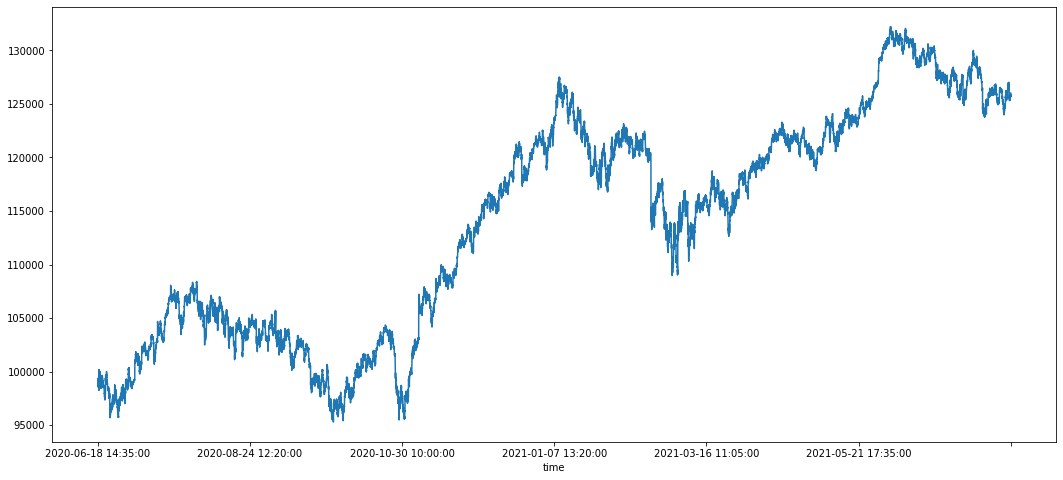

In [37]:
pd.read_csv('win_5m.csv', index_col=0)['close'].plot(figsize=(18,8))

In [38]:
#Obtenção do book de ofertas
def get_book(ativo, data_inicio, n=10):
    ativo = mt5.copy_ticks_from(ativo, data_inicio, n, mt5.COPY_TICKS_ALL)
    ativo = pd.DataFrame(ativo)
    ativo['time']=pd.to_datetime(ativo['time'], unit='s' )
    #ativo.set_index('time',inplace=True)
    return ativo

In [39]:
book = get_book('WINQ21', datetime(2021,7,22))

In [40]:
book

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2021-07-22 08:55:00,126575.0,124000.0,0.0,0,1626944100200,6,0.0
1,2021-07-22 08:55:17,127055.0,124000.0,0.0,0,1626944117316,2,0.0
2,2021-07-22 08:55:18,127055.0,121425.0,0.0,0,1626944118561,4,0.0
3,2021-07-22 08:55:26,128000.0,121425.0,0.0,0,1626944126349,2,0.0
4,2021-07-22 08:55:32,130425.0,121425.0,0.0,0,1626944132691,2,0.0
5,2021-07-22 08:55:51,130425.0,119000.0,0.0,0,1626944151637,4,0.0
6,2021-07-22 08:55:58,130475.0,119000.0,0.0,0,1626944158069,2,0.0
7,2021-07-22 08:56:00,130475.0,119000.0,0.0,0,1626944160323,2,0.0
8,2021-07-22 08:56:10,131425.0,119000.0,0.0,0,1626944170784,2,0.0
9,2021-07-22 08:56:29,131425.0,113700.0,0.0,0,1626944189125,4,0.0


In [41]:
#AQUI COMEÇA OS TRATAMENTOS PARA A IA

#Lendo o arquivo CSV
df = pd.read_csv("C:\Python36\win_5m.csv", delimiter=',')
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2020-06-18 14:35:00,99057.0,99400.0,99046.0,99359.0,47127,1,158234
1,2020-06-18 14:40:00,99359.0,99384.0,99185.0,99221.0,29338,1,100779
2,2020-06-18 14:45:00,99226.0,99272.0,99169.0,99169.0,18104,1,59180
3,2020-06-18 14:50:00,99169.0,99215.0,99133.0,99164.0,15982,1,53808
4,2020-06-18 14:55:00,99159.0,99195.0,99031.0,99118.0,22544,1,74179
...,...,...,...,...,...,...,...,...
29995,2021-07-29 14:45:00,125820.0,125920.0,125805.0,125850.0,8412,0,126654
29996,2021-07-29 14:50:00,125850.0,125885.0,125770.0,125820.0,9430,0,155652
29997,2021-07-29 14:55:00,125820.0,125870.0,125755.0,125830.0,6576,0,107455
29998,2021-07-29 15:00:00,125830.0,125970.0,125820.0,125955.0,9227,0,148396


In [42]:
df.dtypes
#Mudar o tipo data
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

In [43]:
df.dtypes
df.index

RangeIndex(start=0, stop=30000, step=1)

In [44]:
#criando novos campos (média móvel de 5 e 21)
df['mm5'] = df['close'].rolling(5).mean()
df['mm21'] = df['close'].rolling(21).mean()
df.head(8)

,time,open,high,low,close,tick_volume,spread,real_volume,mm5,mm21
0,2020-06-18 14:35:00,99057.0,99400.0,99046.0,99359.0,47127,1,158234,NaN,NaN
1,2020-06-18 14:40:00,99359.0,99384.0,99185.0,99221.0,29338,1,100779,NaN,NaN
2,2020-06-18 14:45:00,99226.0,99272.0,99169.0,99169.0,18104,1,59180,NaN,NaN
3,2020-06-18 14:50:00,99169.0,99215.0,99133.0,99164.0,15982,1,53808,NaN,NaN
4,2020-06-18 14:55:00,99159.0,99195.0,99031.0,99118.0,22544,1,74179,99206.2,NaN
5,2020-06-18 15:00:00,99113.0,99210.0,98944.0,99000.0,42790,1,159602,99134.4,NaN
6,2020-06-18 15:05:00,99000.0,99046.0,98749.0,98770.0,36639,1,128113,99044.2,NaN
7,2020-06-18 15:10:00,98775.0,98867.0,98734.0,98816.0,24033,1,84971,98973.6,NaN


In [45]:
#Empurrando os valores das ações para frente
#df['close'] = df['close'].shift(-1)
#df.head()

In [46]:
df.dropna(inplace=True)
df

,time,open,high,low,close,tick_volume,spread,real_volume,mm5,mm21
20,2020-06-18 16:15:00,98575.0,98647.0,98519.0,98565.0,16846,1,60230,98650.0,98905.476190
21,2020-06-18 16:20:00,98560.0,98632.0,98442.0,98560.0,23496,1,82430,98600.8,98867.428571
22,2020-06-18 16:25:00,98560.0,98667.0,98539.0,98596.0,19042,1,71031,98598.8,98837.666667
23,2020-06-18 16:30:00,98591.0,98688.0,98457.0,98621.0,31749,1,119565,98583.4,98811.571429
24,2020-06-18 16:35:00,98616.0,98678.0,98575.0,98632.0,16432,1,57874,98594.8,98786.238095
...,...,...,...,...,...,...,...,...,...,...
29995,2021-07-29 14:45:00,125820.0,125920.0,125805.0,125850.0,8412,0,126654,125771.0,125773.809524
29996,2021-07-29 14:50:00,125850.0,125885.0,125770.0,125820.0,9430,0,155652,125792.0,125775.238095
29997,2021-07-29 14:55:00,125820.0,125870.0,125755.0,125830.0,6576,0,107455,125823.0,125776.904762
29998,2021-07-29 15:00:00,125830.0,125970.0,125820.0,125955.0,9227,0,148396,125856.0,125779.047619


In [47]:
#verificando quantidade de linhas
qtd_linhas = len(df)
qtd_linhas_treino = (qtd_linhas * 0.7)
qtd_linhas_teste = (qtd_linhas * 0.25)
qtd_linhas_validacao = qtd_linhas - qtd_linhas_treino - qtd_linhas_teste
print(qtd_linhas_treino)
print(qtd_linhas_teste)
print(qtd_linhas_validacao)

20986.0
7495.0
1499.0


In [48]:
#df = df.reset_index(drop=True)
#df = df.set_index(0)
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#df.drop('time',axis=0,inplace=True)
df

,time,open,high,low,close,tick_volume,spread,real_volume,mm5,mm21
2020-06-18 16:15:00,2020-06-18 16:15:00,98575.0,98647.0,98519.0,98565.0,16846,1,60230,98650.0,98905.476190
2020-06-18 16:20:00,2020-06-18 16:20:00,98560.0,98632.0,98442.0,98560.0,23496,1,82430,98600.8,98867.428571
2020-06-18 16:25:00,2020-06-18 16:25:00,98560.0,98667.0,98539.0,98596.0,19042,1,71031,98598.8,98837.666667
2020-06-18 16:30:00,2020-06-18 16:30:00,98591.0,98688.0,98457.0,98621.0,31749,1,119565,98583.4,98811.571429
2020-06-18 16:35:00,2020-06-18 16:35:00,98616.0,98678.0,98575.0,98632.0,16432,1,57874,98594.8,98786.238095
...,...,...,...,...,...,...,...,...,...,...
2021-07-29 14:45:00,2021-07-29 14:45:00,125820.0,125920.0,125805.0,125850.0,8412,0,126654,125771.0,125773.809524
2021-07-29 14:50:00,2021-07-29 14:50:00,125850.0,125885.0,125770.0,125820.0,9430,0,155652,125792.0,125775.238095
2021-07-29 14:55:00,2021-07-29 14:55:00,125820.0,125870.0,125755.0,125830.0,6576,0,107455,125823.0,125776.904762
2021-07-29 15:00:00,2021-07-29 15:00:00,125830.0,125970.0,125820.0,125955.0,9227,0,148396,125856.0,125779.047619


In [49]:
#separando as features e Labels
features = df.drop(['time','spread'],1)
labels = df['close']

In [50]:
#escolhendo as melhores features com Kbest
features_list = ('open', 'real_volume', 'tick_volume','mm5')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'tick_volume': 41652.40871314157, 'mm5': 40364.411061450424, 'real_volume': 18151.947519800848}


C:\Python36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [51]:
#Normalizando os dados de entrada (features) para que não sejam atribuídos pesos a eles
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ',features_scale.shape)
print(features_scale)#Normalizando os dados de entrada

Features:  (29980, 8)
[[0.08869678 0.08591308 0.08891718 ... 0.08025477 0.08634368 0.08990366]
 [0.08829029 0.0855054  0.0868317  ... 0.11442539 0.08500232 0.0888595 ]
 [0.08829029 0.08645666 0.08945886 ... 0.09687985 0.08494779 0.08804273]
 ...
 [0.82702366 0.82580926 0.82658036 ... 0.15294429 0.82717631 0.82735021]
 [0.82729465 0.82852717 0.82834083 ... 0.21596137 0.82807601 0.82740902]
 [0.83081759 0.82907075 0.83064298 ... 0.06475947 0.82894844 0.82747436]]


In [52]:
#Separa os dados de treino teste e validação
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print( len(X_train), len(y_train))
print( len(X_test), len(y_test))

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [ ]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

In [ ]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train_scale, y_train)
pred= rn.predict(X_test_scale)

cd = rn.score(X_test_scale, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

In [ ]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train_scale,y_train)
clf = search.best_estimator_
pred= search.predict(X_test_scale)

cd = search.score(X_test_scale, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

In [ ]:
valor_novo = features.tail(1)
valor_novo

In [ ]:
#executando a previsão


previsao=scaler.transform(valor_novo)


pred=lr.predict(previsao)

pred

In [ ]:
df = df[df['sigla_acao'] == 'ITUB4' ]

In [ ]:
data_pregao_full=df['data_pregao']
data_pregao=data_pregao_full.tail(1)

res_full=df['preco_fechamento']
res=res_full.tail(1)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

print(df)